# Evaluate SCHOLAR results

In [141]:
# synth
dataset = "synth"

In [258]:
import os, sys, scipy, json
from scipy import sparse
import codecs
import numpy as np
import pandas as pd
import file_handling as fh
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [143]:
if sys.platform == "darwin":
    pass
else:
    if dataset == "synth":
         input_dir = "/nfs/home/maxa/results/"+dataset+'/scholar_split/train_val'       
print(input_dir)
#try:
#    os.mkdir(output_dir)
#except:
#pass

/nfs/home/maxa/results/synth/scholar_split/train_val


In [204]:
print(len(os.listdir(input_dir)))

532


In [205]:
input_dir

'/nfs/home/maxa/results/synth/scholar_split/train_val'

In [277]:
df_weights = pd.DataFrame(columns=["z1","z2","z3","x1"])
pR = pd.DataFrame()
mse = pd.DataFrame()
pRs = []
mses = []
runs_dir = input_dir
for run in tqdm(os.listdir(runs_dir)):
    # load reg weights
    try:
        temp = pd.read_csv(os.path.join(runs_dir,run,'best_val_regression_weights.txt'), header = None)
        weights = []
        for val in temp[0]:
            weights.append(float(re.sub('[^A-Za-z0-9\.-]+', '', val)))  
    except:
        try:
            temp = pd.read_csv(os.path.join(runs_dir,run,'best_val_regression_weights.csv'), header = 0, index_col = 0)
            weights = list(temp.W)
        except:
            continue
    # load topics and order them
    w4 = weights[3]
    weights = weights[:3]
    try:
        topics = pd.read_csv(os.path.join(runs_dir,run,"topics_sparsity_weighted.txt"), header = None)
    except:
        try:
            topics = pd.read_csv(os.path.join(runs_dir,run,"topics.txt"), header = None)
        except:
            continue
    for t,w in zip(topics[0],weights):
        if (t[0] == str(8) or t[0] == str(9)) and (t[2] == str(8) or t[2] == str(9)):
            t3 = t
            w3 = w
        elif len(t) > 5:
            t1 = t
            w1 = w
        else:
            t2 = t
            w2 = w
    weights = pd.Series([w1,w2,w3,w4])
    weights.index = ["z1","z2","z3","x1"]

    df_weights = df_weights.append(weights, ignore_index = True)
    
    pRs.append(pd.read_csv(os.path.join(runs_dir,run,'train_pR2.txt'),
                           header = None).values[0][0])
    mses.append(pd.read_csv(os.path.join(runs_dir,run,'train_mse.txt'),
                           header = None).values[0][0])   
pR = pd.DataFrame(pRs, columns = ["pR"])
mse = pd.DataFrame(mses, columns = ["mse"])


100%|██████████| 531/531 [00:48<00:00, 10.97it/s]


In [278]:
print("overall bootstraps evaluated:",mse.shape[0])

overall bootstraps evaluated: 530


In [297]:
df_weights.to_csv("/nfs/home/maxa/results/synth/scholar_split/scholar_regweight_bootstrap.csv")
mse.to_csv("/nfs/home/maxa/results/synth/scholar_split/scholar_mses_bootstrap.csv")
pR.to_csv("/nfs/home/maxa/results/synth/scholar_split/scholar_pR2s_bootstrap.csv")

In [279]:
df_weights.quantile(0.025)

z1   -0.169277
z2   -0.327296
z3   -0.314188
x1   -1.406929
Name: 0.025, dtype: float64

In [280]:
df_weights.median()

z1    0.066532
z2   -0.145699
z3   -0.138719
x1   -1.362737
dtype: float64

In [281]:
df_weights.quantile(0.975)

z1    0.085460
z2   -0.031850
z3   -0.040431
x1   -0.610997
Name: 0.975, dtype: float64

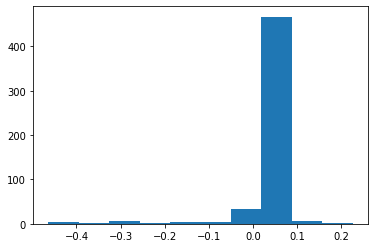

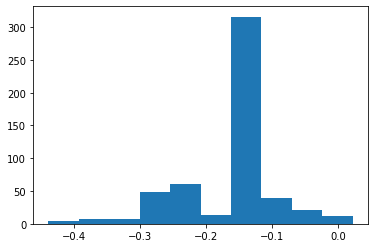

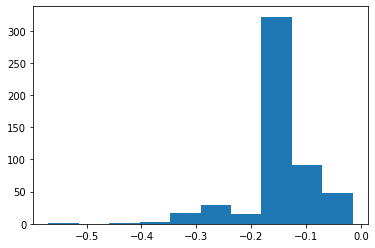

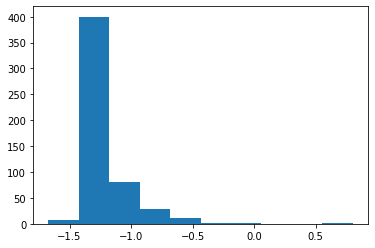

In [288]:
for col in df_weights.columns:
    plt.figure()
    plt.hist(df_weights[col])

In [301]:
mse.mean(), pR.mean()

(mse    0.055148
 dtype: float64,
 pR    0.284582
 dtype: float64)

In [201]:
beta[0].sum()

3.6331835

In [202]:
beta[1].sum()

-2.6563582

In [203]:
beta[2].sum()

0.22251487

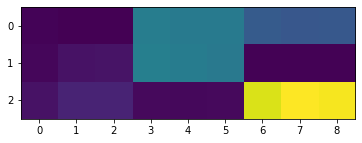

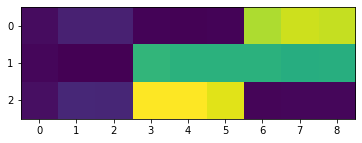

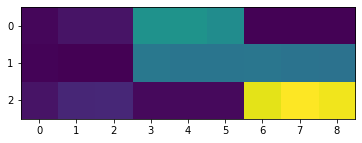

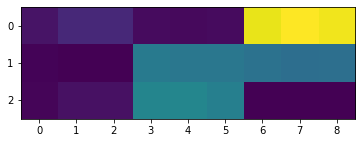

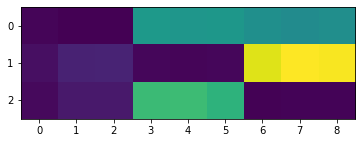

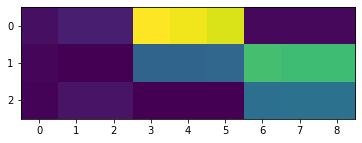

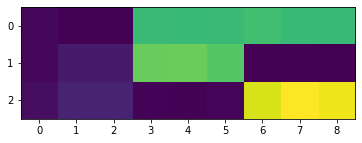

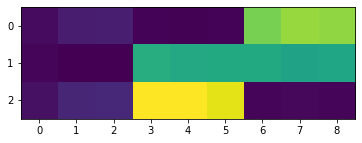

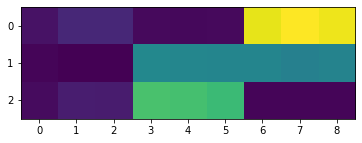

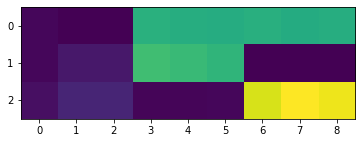

In [191]:
examples = [1,10,50,100,150,200,250,300,350,400]

for e in examples:
    run = 'k3_ep500_nointercept_run_{}'.format(e)
    beta = np.load(os.path.join(runs_dir,run,"beta.npz"))["beta"]
    plt.figure()
    plt.imshow(scipy.special.softmax(beta))
    #plt.close()

In [235]:
weights = [1,2,3]
for e in examples:
    run = 'k3_ep500_nointercept_run_{}'.format(e)
    try:
        topics = pd.read_csv(os.path.join(runs_dir,run,"topics_sparsity_weighted.txt"), header = None)
    except:
        topics = pd.read_csv(os.path.join(runs_dir,run,"topics.txt"), header = None)
    for t in topics[0]:
        print(t)
    print("____")
    for t,w in zip(topics[0],weights):
        if (t[0] == str(8) or t[0] == str(9)) and (t[2] == str(8) or t[2] == str(9)):
            t3 = t
            w3 = w
        elif len(t) > 5:
            t1 = t
            w1 = w
        else:
            t2 = t
            w2 = w
    print(t1,">>",w1,"\n",t2,">>",w2,"\n",t3,">>",w3)
    print("#####")

4 6 5 7 9 8
4 5 6
8 9 7
____
4 6 5 7 9 8 >> 1 
 4 5 6 >> 2 
 8 9 7 >> 3
#####
8 9 7
4 7 6 5 9 8
5 4 6
____
4 7 6 5 9 8 >> 2 
 5 4 6 >> 3 
 8 9 7 >> 1
#####
5 4 6
4 7 5 6 8 9
8 9 7
____
4 7 5 6 8 9 >> 2 
 5 4 6 >> 1 
 8 9 7 >> 3
#####
8 9 7 2 3
4 5 6 7 9 8
5 4 6
____
4 5 6 7 9 8 >> 2 
 5 4 6 >> 3 
 8 9 7 2 3 >> 1
#####
4 6 5 7 9 8
8 9 7
5 4 6
____
4 6 5 7 9 8 >> 1 
 5 4 6 >> 3 
 8 9 7 >> 2
#####
4 5 6
7 9 8 6 4 5
9 8 7
____
7 9 8 6 4 5 >> 2 
 4 5 6 >> 1 
 9 8 7 >> 3
#####
7 4 6 5 9 8
5 4 6
8 9 7
____
7 4 6 5 9 8 >> 1 
 5 4 6 >> 2 
 8 9 7 >> 3
#####
8 9 7
4 6 7 5 9 8
4 5 6
____
4 6 7 5 9 8 >> 2 
 4 5 6 >> 3 
 8 9 7 >> 1
#####
8 9 7
4 5 7 6 9 8
4 5 6
____
4 5 7 6 9 8 >> 2 
 4 5 6 >> 3 
 8 9 7 >> 1
#####
4 7 5 9 6 8
4 5 6
8 9 7
____
4 7 5 9 6 8 >> 1 
 4 5 6 >> 2 
 8 9 7 >> 3
#####


# 